In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import starbars
from scipy.stats import mannwhitneyu 

wr.filterwarnings('ignore')

# Loading and reading dataset
df = pd.read_excel("summary_tests.xlsx")


#print(df)



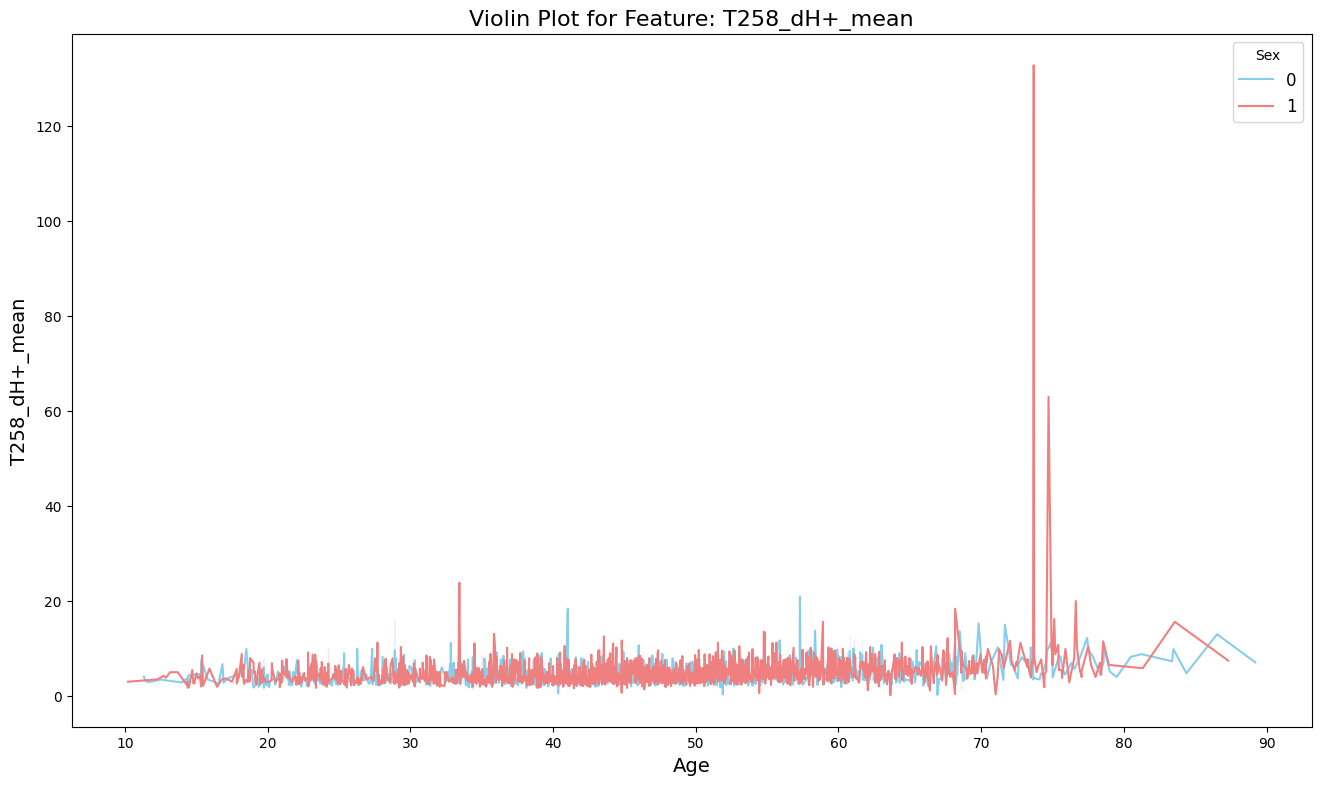

In [ ]:
# Ограничиваем данные первыми 50 строками


# Выбираем признаки, исключая ненужные столбцы
features = [column for column in df.columns if column not in ['id_sample', 'age', 'sex']]

# Устанавливаем размер графика
plt.figure(figsize=(16, 9))

# Выбираем первый признак для визуализации
#

# Создаем violin plot
sns.lineplot(data=df, x='age', y=feature, hue='sex', palette={0: "skyblue", 1: "lightcoral"})

# Добавляем заголовок и подписи осей
plt.title(f'Violin Plot for Feature: {feature}', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel(feature, fontsize=14)

# Добавляем легенду
plt.legend(title='Sex', loc='upper right', fontsize=12)

# Отображаем график
plt.show()
